In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
#Import dataset
DomasticMovies = pd.read_csv('P4-Section6-Homework-Dataset.csv',encoding ='latin1')
DomasticMovies.head()
DomasticMovies.info()
DomasticMovies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    object 
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    object 
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    object 
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    object 
 14  Profit%                 608 non-null    fl

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


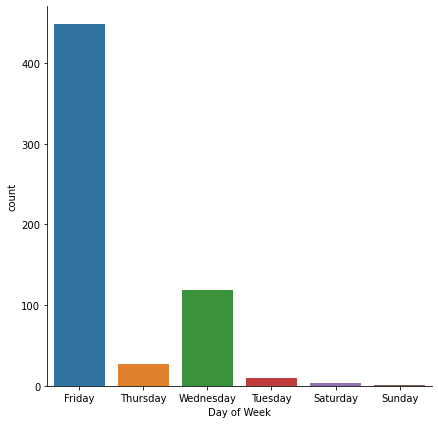

In [17]:
k1 = sns.factorplot(data=DomasticMovies, x='Day of Week',kind='count',size = 6)
#k2 = sns.factorplot(data=DomasticMovies,x='Genre',kind='count',size=10)

In [28]:
#Create DataFrame for required Studio and Genre
movi = DomasticMovies[(DomasticMovies.Studio == 'WB') | (DomasticMovies.Studio == 'Fox')]
movi.Studio.unique()

array(['WB', 'Fox'], dtype=object)

In [30]:
#List of Genre category
GenreList = list(['action', 'adventure', 'animation','drama'])
#List of Studio
StudioList = list(['Buena Vista Studios','Sony', 'Universal','WB','Paramount Pictures','Fox'])

In [46]:
#Cool way to create sub dataframe
movie = DomasticMovies[DomasticMovies.Studio.isin(StudioList) & DomasticMovies.Genre.isin(GenreList)]
print("Studio",movie.Studio.unique())
print("Genre",movie.Genre.unique())

Studio ['Buena Vista Studios' 'Sony' 'Universal' 'WB' 'Paramount Pictures' 'Fox']
Genre ['action' 'adventure' 'animation' 'drama']


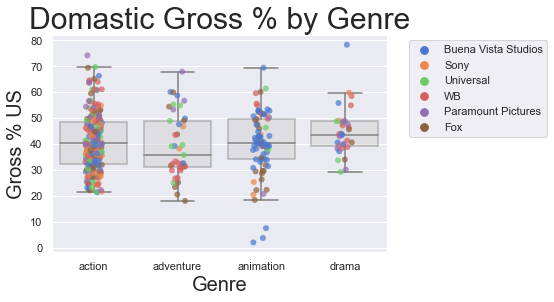

In [102]:
#Let plot the graph
sns.set(style='darkgrid',palette='muted',color_codes='True')
ax = sns.boxplot(data=movie,x='Genre',y='Gross % US',orient='v',color='lightgray',showfliers = False, fliersize=30)
plt.setp(ax.artists,alpha =0.5)

sns.stripplot(data=movie,x='Genre',y='Gross % US',hue='Studio',size=6,jitter=True,linewidth=0,alpha = 0.7)
ax.axes.set_title("Domastic Gross % by Genre",fontsize=30)
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Gross % US',fontsize=20)

ax.legend(bbox_to_anchor=(1.05,1))


plt.show()

In [99]:
#clean up the columns for better manuapulation. 
DomasticMovies.columns = (['DayofWeek', 'Director', 'Genre', 'MovieTitle', 'ReleaseDate',
       'Studio', 'AdjustedGross', 'Budget', 'Gross',
       'IMDbRating', 'MovieLensRating', 'OverseasCollection', 'OverseasCollection%',
       'Profit', 'Profit%', 'RuntimeInMin', 'USCollection',
       'GrossUsCollection%'])

In [100]:
#DomasticMovies.info()
#change objects to category
DomasticMovies.DayofWeek = DomasticMovies.DayofWeek.astype('category')
DomasticMovies.Director  = DomasticMovies.Director.astype('category')
DomasticMovies.Genre     = DomasticMovies.Genre.astype('category')
DomasticMovies.ReleaseDate = DomasticMovies.ReleaseDate.astype('category')
DomasticMovies.Studio    = DomasticMovies.Studio.astype('category')
DomasticMovies.DayofWeek = DomasticMovies.DayofWeek.astype('category')

In [42]:
#DomasticMovies.Genre.cat.categories
#List of Genre category
GenreList = list(['action', 'adventure', 'animation','drama'])
#List of Studio
#DomasticMovies.Studio.cat.categories
StudioList = list(['Buena Vista Studios','Sony', 'Universal','WB','Paramount Pictures','Fox'])

In [103]:
#Sub list
Gentf = list()
for item in DomasticMovies.Genre:
    if item in GenreList:
        Gentf.append(True)
    else:
        Gentf.append(False)
        


In [125]:
NewData = DomasticMovies[Gentf]
NewData.Genre.cat.categories

Index(['action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'horror', 'musical', 'mystery',
       'romance', 'sci-fi', 'thriller'],
      dtype='object')

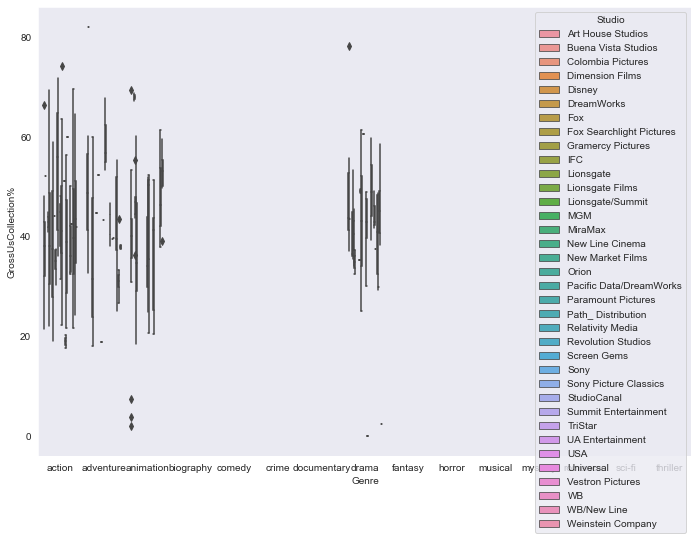

In [123]:
#Plot Graph for 
sns.set_style('dark')
fig, axes = plt.subplots()
fig.set_size_inches(11.7,8.27)

k = sns.boxplot(data=NewData,x='Genre',y='GrossUsCollection%', hue='Studio')